# Uso Avanzado de Matplotlib e Introducción a Pandas
En esta sesión, estudiaremos la forma orientada a objetos de utilizar `matplotlib`, así como métodos útiles y consejos sobre narración de datos. Luego, veremos una introducción a Pandas y cómo utilizarlo realizar análisis de datos.

## Temario
1. _OO_ `matploltib`
2. Narración de Datos
    1. Correlaciónno Implica Causalidad
    2. Método de la tinta
3. Formatos Comunes de Datasets
    1. JSON
    2. CSV
4. Introducción a Pandas
    1. ¿Qué es _Pandas_?
    2. Importando `pandas`
    3. `dataframe`

In [73]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## _OO_ `matplotlib`
Hemos visto antes como trabajar en la forma _stateful_ de `matplotlib`, es decir, modificando el estado global del objeto `matplotlib.pyplot`, sin embargo, suele ser conveniente trabajar en una forma más _"Orientada a Objetos"_ de `matplotlib`. Para estas situaciones, utilizamos `subplots`.

### Creando `subplots`
Para crear una pareja de `figure`, `[axes]` utilizamos el método inicializador `plt.subplots()`. Este método devuelve un objeto `figure`, que es el contenedor de nuestros `subplot`s y una lista de objetos `subplot`, que son los ejes en los que graficaremos.

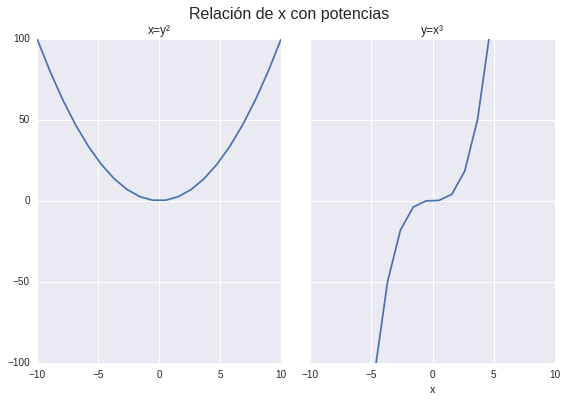

In [150]:
x = np.linspace(-10,10,20)
y = x**2
y_2 = x**3

plt.style.use("seaborn")
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True)

fig.suptitle("Relación de x con potencias", size=16)
fig.tight_layout()
fig.subplots_adjust(top=.90)

ax1.plot(x,y)
ax1.set_title("x=y²")
ax1.set_ylim(-100,100)

ax2.plot(x,y_2)
ax2.set_title("y=x³")
ax2.set_xlabel("x")

plt.show()

## Narración de Datos
Es importante presentar de forma entendible los datos obtenidos de un estudio para evitar incurrir en _falacias_ narrativas. 
### Correlación no Implica Causalidad
Esta frase se refiere a que el hecho de que dos grupos de datos se encuentren correlacionados (es decir, que haya una relación en sus cambios) no implica que uno sea la causa del otro. Un buen ejemplo de esto es la relación entre arrestos juveniles por pocesión de marihuana y la cantidad de colonias de abejas meleras en EEUUAA.  
![falsa_correlación_abejas_marihuana](http://tylervigen.com/correlation_project/correlation_images/honey-producing-bee-colonies-us_juvenile-arrests-for-possession-of-marijuana-us.png)

### Método de la Tinta
Algo muy importante en la narración de datos es que nuestra información no se vea opacada por el decoro o la contaminación de gráfica que puede generar el agregar indicadores o gráficos innecesarios. El método de la tinta consiste en reducir lo más posible el radio de _tinta-información_ que nuestra gráfica presenta. El siguiente GIF hecho por [Darkhorse Analytics](https://www.darkhorseanalytics.com/blog/data-looks-better-naked) ilustra claramente el concepto:  
![ink_method](https://s3.amazonaws.com/dq-content/147/data-ink.gif)

## Formatos Comunes de Datasets
Comunmente, recibiremos los datasets a analizar o resultados de algún experimento en un par de formatos. Generalmente son en bases de datos tales como _MySQL_, _MongoDB_, _PostgreSQL_, etc. o en algún formato de texto como _JSON_ o _CSV_.

### Formato _JSON_
El formato _JSON (Javascript Object Notation)_ es un formato comunmente utilizado para agrupar información en bloques lógicos. Es un formato de texto plano comunmente utilizado en tecnologías web para transmitir información estructurada de forma estandarizada.
```json
{"menu": {
  "id": "file",
  "value": "File",
  "popup": {
    "menuitem": [
      {"value": "New", "onclick": "CreateNewDoc()"},
      {"value": "Open", "onclick": "OpenDoc()"},
      {"value": "Close", "onclick": "CloseDoc()"}
    ]
  }
}}
```
Se puede ver que su estructura es equivalente a un diccionario de Python. Para interactuar en Python con texto con formato _JSON_, utilizamos la librería `json`

In [131]:
import json
texto_json = """{"nombre": "David", 
               "edad": 19, 
               "ciudad": "Guanajuato"}"""
json_dict = json.loads(texto_json)
json_dict["nombre"]

'David'

### Formato _CSV_
El formato _CSV (Comma Separated Values)_ es otro formato de texto plano común para datasets. En este, se describe una tabla separando columnas con comas (o algún otro caracter) y filas con líneas nuevas.
```csv
name,department,birthday month
John Smith,Accounting,November
Erica Meyers,IT,March
```
Existe una forma en la librería estándar para [interactuar con _CSV_](https://realpython.com/python-csv/), pero es más conveniente en el análisis de datos utilizar el _parser_ que `pandas` provee. 

## Introducción a _Pandas_
### ¿Qué es _Pandas_?
Según el [sitio oficial de _Pandas_](https://pandas.pydata.org/):
> `pandas` es una librería de fuente abierta con licencia BSD que provee estructuras de datos y herramientas de análisis de datos de alto desempeño que son fáciles de usar para Python.

### Importando `pandas`
La forma más común de importar pandas es renombrarlo a `pd`:

In [132]:
import pandas as pd

### `dataframe`
Los `dataframe`s en `pandas` son una estructura de datos que nos permite estudiar los datos de forma estructurada como una tabla. Existen muchas formas de crear `dataframe`s en pandas, veamos el ejemplo de cargar uno desde un archivo `.csv`:

In [145]:
test_frame = pd.read_csv("./examples/test.csv")
print(test_frame)
print()
print(test_frame["department"])
print()
test_frame.info()

           name  department birthday month
0    John Smith  Accounting       November
1  Erica Meyers          IT          March

0    Accounting
1            IT
Name: department, dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
name              2 non-null object
department        2 non-null object
birthday month    2 non-null object
dtypes: object(3)
memory usage: 176.0+ bytes
